In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_original = pd.read_csv('pharmacy_tx.csv')

In [3]:
df = df_original.copy()

In [4]:
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00


In [5]:
df['bin'] = df['bin'].astype(str)
df['pcn'] = df['pcn'].astype(str).str.upper()
df['group'] = df['group'].astype(str).str.upper()
df['rejected'][df['rejected'] == False] = 0
df['rejected'][df['rejected'] == True] = 1

<ipython-input-5-452d2e24b45f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rejected'][df['rejected'] == False] = 0


In [6]:
df.head()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NAN,0.0,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NAN,52H8KH0F83K,0.0,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NAN,0.0,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,0.0,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NAN,ZX2QUWR,0.0,47.00


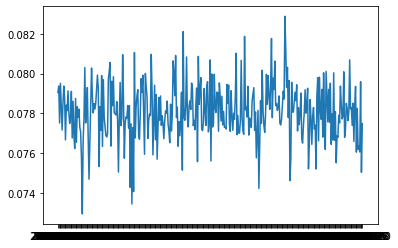

In [7]:
df_time = df[['tx_date', 'rejected']]
df_time_rates = df_time.groupby(['tx_date']).mean()
plt.plot(df_time_rates)

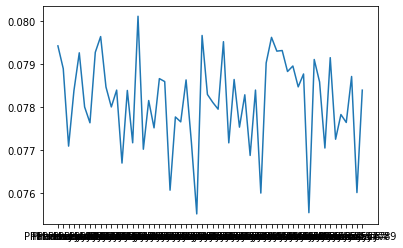

In [8]:
df_pharmacy = df[['pharmacy', 'rejected']]
df_pharmacy_rates = df_pharmacy.groupby(['pharmacy']).mean()
plt.plot(df_pharmacy_rates)

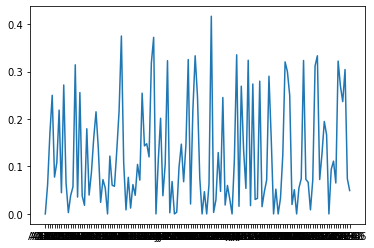

In [9]:
df_diagnosis = df[['diagnosis', 'rejected']]
df_diagnosis_rates = df_diagnosis.groupby(['diagnosis']).mean()
plt.plot(df_diagnosis_rates)

In [10]:
df_diagnosis_groups = df_diagnosis.groupby(['diagnosis'])
df_diagnosis_rejection = df_diagnosis_groups.sum()

In [11]:
tot = 0
for name, group in df_diagnosis_groups.groups.items():
    if df_diagnosis_rejection.loc[name, 'rejected'] == 0:
        tot += len(group)
print(tot)
print(tot / len(df))

329040
0.02365450958300947


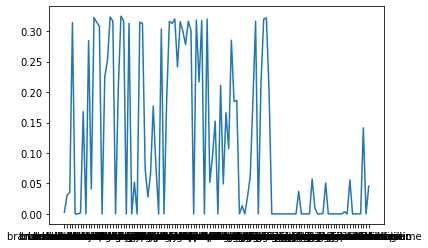

In [12]:
df_drug = df[['drug', 'rejected']]
df_drug_rates = df_drug.groupby(['drug']).mean()
plt.plot(df_drug_rates)

In [13]:
df_drug_rates[df_drug_rates['rejected'] == 0]

,rejected
drug,
branded cibroniudosin,0.0
branded cicrochoric,0.0
branded cupitelol,0.0
branded dienulol,0.0
branded foxivelule,0.0
branded glulune,0.0
branded glycontazepelol,0.0
branded gorol,0.0
branded lalol,0.0


In [14]:
df_drug_groups = df_drug.groupby(['drug'])
df_drug_rejection = df_drug_groups.sum()

In [15]:
tot = 0
for name, group in df_drug_groups.groups.items():
    if df_drug_rejection.loc[name, 'rejected'] == 0:
        tot += len(group)
print(tot)
print(tot / len(df))

7680647
0.5521576041369224


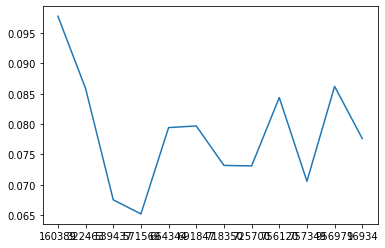

In [16]:
df_bin = df[['bin', 'rejected']]
df_bin_rates = df_bin.groupby(['bin']).mean()
plt.plot(df_bin_rates)

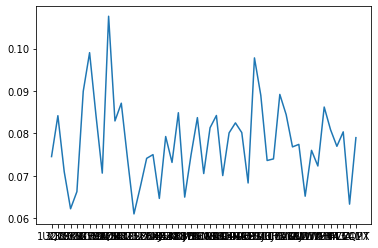

In [17]:
df_pcn = df[['pcn', 'rejected']]
df_pcn_rates = df_pcn.groupby(['pcn']).mean()
plt.plot(df_pcn_rates)

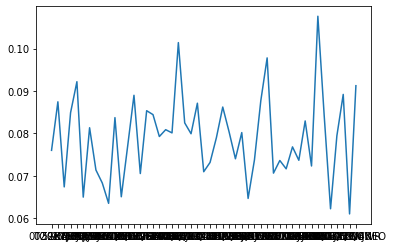

In [18]:
df_group = df[['group', 'rejected']]
df_group_rates = df_group.groupby(['group']).mean()
plt.plot(df_group_rates)

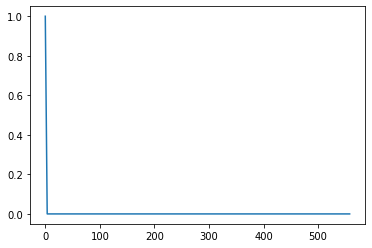

In [19]:
df_payment = df[['patient_pay', 'rejected']]
df_payment_rates = df_payment.groupby(['patient_pay']).mean()
plt.plot(df_payment_rates)

In [20]:
print(sum(df_payment_rates['rejected'] == 0))
print(len(df_payment_rates))

20436
20437


In [21]:
df_all = df[['diagnosis', 'drug', 'bin', 'pcn', 'group', 'rejected']]
df_all_groups = df_all.groupby(['diagnosis', 'drug', 'bin', 'pcn', 'group'])
df_all_rejections = df_all_groups.sum()

In [22]:
tot = 0
for name, group in df_all_groups.groups.items():
    if df_all_rejections.loc[name, 'rejected'] == 0:
        tot += len(group)
print(tot)
print(tot / len(df))

9782355
0.7032482679671184


In [23]:
indices = [group.to_numpy() for name, group in df_all_groups.groups.items() if df_all_rejections.loc[name, 'rejected'] > 0]
indices = np.concatenate(indices)

In [24]:
print(len(indices))
print(len(indices) / len(df))

4127889
0.2967517320328817


In [25]:
df.loc[indices, :]['drug'].str.startswith('branded')

300084      True
1209882     True
2232464     True
3455481     True
4474678     True
            ... 
12888033    True
13280017    True
13289715    True
13620710    True
13903780    True
Name: drug, Length: 4127889, dtype: bool

In [26]:
df.loc[indices, :].to_csv('non_preferred.csv', index = False)
df.drop(index = indices).to_csv('preferred.csv', index = False)

In [27]:
df_all_nan = df_all[(df_all['pcn'] == 'NAN') | (df_all['group'] == 'NAN')]
df_all_nan_groups = df_all_nan.groupby(['diagnosis', 'drug', 'bin', 'pcn', 'group'])
df_all_nan_rejections = df_all_nan_groups.sum()

In [28]:
tot = 0
for name, group in df_all_nan_groups.groups.items():
    if df_all_nan_rejections.loc[name, 'rejected'] == 0:
        tot += len(group)
print(tot)
print(tot / len(df))

5249172
0.3773601670826191


In [29]:
a = sum((df['rejected'] == 1) & (df['patient_pay'] == 0))
b = sum(df['rejected'] == 1)
c = sum(df['patient_pay'] == 0)
print(a)
print(b)
print(c)

1086860
1086860
1086860
